In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pynq.overlays.base import BaseOverlay

base = BaseOverlay('base.bit')

base.init_rf_clks()

In [2]:
base.radio.transmitter.channel[0].dac_block.MixerSettings['Freq'] = 1230 # MHz 
base.radio.transmitter.channel[1].dac_block.MixerSettings['Freq'] = 1400 # MHz

In [3]:
for i in range(0, len(base.radio.transmitter.channel)):
    base.radio.transmitter.channel[i].control.gain = 0.5
    base.radio.transmitter.channel[i].control.enable = True

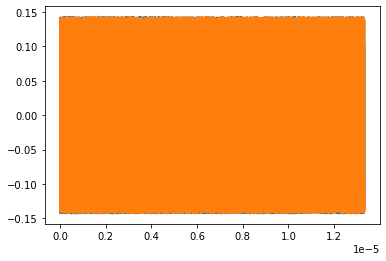

In [20]:
number_samples = 32768
cdata = (base.radio.receiver.channel[1].transfer(number_samples))

sample_frequency = 2457.6e6
time = np.arange(0, number_samples/sample_frequency, 1/sample_frequency)
plt.plot(time, np.real(cdata))
plt.plot(time, np.imag(cdata))
plt.show()